In [1]:
import numpy
import qubit_matmul
from matplotlib import pyplot
from scipy.stats import unitary_group

# Single Qubit

Let $|\rho\rangle = \rho_{ij} |{ij}\rangle$

Channel is from $\langle b |\langle b | \hat{T} |\rho\rangle | \cdot \rangle$

Lets get $\hat{T} = \int dU U \otimes U^*$

In [2]:
def get_t(k=1,iters=100000, real=True):
    t = numpy.zeros((2**(2*k),2**(2*k)), dtype=numpy.complex128)
    for _ in range(iters):
        u = unitary_group.rvs(2)
        acc = numpy.kron(u, numpy.conjugate(u))
        for _ in range(k-1):
            acc = numpy.kron(acc, numpy.kron(u, numpy.conjugate(u)))
        t += acc
    t /= iters
    if real:
        t = t.real
    return t

In [3]:
qubit_t = get_t(k=2)

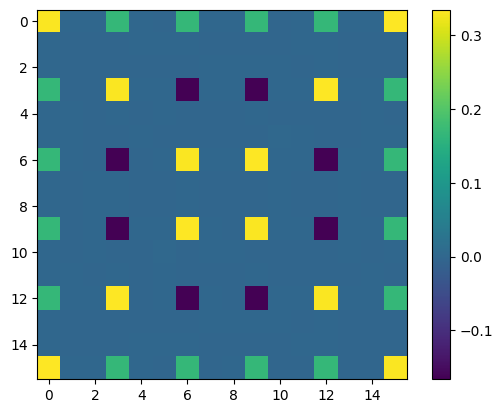

In [4]:
# qubit_t[qubit_t<1e-3] = 0
qubit_t
pyplot.imshow(qubit_t)
pyplot.colorbar()
pyplot.show()

In [10]:
qubit_t.min(), qubit_t.max()

(-0.166370555454514, 0.33462039091473356)

In [5]:
numpy.arange(numpy.prod(qubit_t.shape)).reshape(qubit_t.shape)

array([[  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15],
       [ 16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,  27,  28,
         29,  30,  31],
       [ 32,  33,  34,  35,  36,  37,  38,  39,  40,  41,  42,  43,  44,
         45,  46,  47],
       [ 48,  49,  50,  51,  52,  53,  54,  55,  56,  57,  58,  59,  60,
         61,  62,  63],
       [ 64,  65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,
         77,  78,  79],
       [ 80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,  92,
         93,  94,  95],
       [ 96,  97,  98,  99, 100, 101, 102, 103, 104, 105, 106, 107, 108,
        109, 110, 111],
       [112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124,
        125, 126, 127],
       [128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140,
        141, 142, 143],
       [144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156,
        157, 158, 159],
       [160, 161, 162, 163, 16

In [6]:
indexed_qubit_t = qubit_t.reshape((2,2,2,2,2,2,2,2))
it = numpy.nditer(indexed_qubit_t, flags=['multi_index'])
for x in it:
    print(f"{it.multi_index}\t{x}")

(0, 0, 0, 0, 0, 0, 0, 0)	0.332638498176237
(0, 0, 0, 0, 0, 0, 0, 1)	0.0006873279457801529
(0, 0, 0, 0, 0, 0, 1, 0)	0.0006873279457801529
(0, 0, 0, 0, 0, 0, 1, 1)	0.166370555454514
(0, 0, 0, 0, 0, 1, 0, 0)	0.0006873279457801529
(0, 0, 0, 0, 0, 1, 0, 1)	-0.00020479619994894372
(0, 0, 0, 0, 0, 1, 1, 0)	0.16637055545451404
(0, 0, 0, 0, 0, 1, 1, 1)	1.8647237734869642e-05
(0, 0, 0, 0, 1, 0, 0, 0)	0.0006873279457801529
(0, 0, 0, 0, 1, 0, 0, 1)	0.16637055545451404
(0, 0, 0, 0, 1, 0, 1, 0)	-0.00020479619994894372
(0, 0, 0, 0, 1, 0, 1, 1)	1.8647237734869642e-05
(0, 0, 0, 0, 1, 1, 0, 0)	0.166370555454514
(0, 0, 0, 0, 1, 1, 0, 1)	1.8647237734869642e-05
(0, 0, 0, 0, 1, 1, 1, 0)	1.8647237734869642e-05
(0, 0, 0, 0, 1, 1, 1, 1)	0.33462039091473356
(0, 0, 0, 1, 0, 0, 0, 0)	0.00023505856176238882
(0, 0, 0, 1, 0, 0, 0, 1)	-0.00042856235323608454
(0, 0, 0, 1, 0, 0, 1, 0)	-0.0006878997594669208
(0, 0, 0, 1, 0, 0, 1, 1)	-0.00023505856176238803
(0, 0, 0, 1, 0, 1, 0, 0)	0.0004627371779594771
(0, 0, 0, 1, 0, 1

In [7]:
zeroed_indexed_qubit_t = indexed_qubit_t.copy()
zeroed_indexed_qubit_t[numpy.abs(zeroed_indexed_qubit_t)<1e-2] = 0

In [8]:
rho = numpy.array([2,3,5,7]).reshape((2,2))
rho_estimator = numpy.einsum('ababdcef,cd->ef', zeroed_indexed_qubit_t, rho) * 3 - numpy.trace(rho) * numpy.eye(2)
rho

array([[2, 3],
       [5, 7]])

In [9]:
rho_estimator

array([[1.99111666, 2.99467   ],
       [4.99111666, 7.00888334]])